### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs created are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [4]:
#Import US_wildfires pkl file

df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

### 2. Data cleaning

In [5]:
#Categorise wildfire causes & add to dataframe

def Cause_category(row):

  if row['NWCG_GENERAL_CAUSE'] in ('Natural'):
    return 'Natural'
  elif row['NWCG_GENERAL_CAUSE'] in ('Debris and open burning','Firearms and explosives use',
                                     'Misuse of fire by a minor'):
    return 'Accidental'
  elif row['NWCG_GENERAL_CAUSE'] in ('Equipment and vehicle use','Power generation/transmission/distribution',
                                   'Railroad operations and maintenance'):
    return 'Accidental Industry'
  elif row['NWCG_GENERAL_CAUSE'] in ('Arson/incendiarism'):
    return 'Malicious'
  elif row['NWCG_GENERAL_CAUSE'] in ('Fireworks','Recreation and ceremony','Smoking'):
    return 'Recreation'
  elif row['NWCG_GENERAL_CAUSE'] in ('Other causes','Missing data/not specified/undetermined'):
    return 'Other/Unknown'

  else: return np.nan

df['Cause_cat'] = df.apply(Cause_category, axis=1)

In [6]:
df.shape

(2166753, 16)

In [7]:
#Create subset for the state of California

df_CA = df[df['STATE']=='CA']

In [8]:
df_CA.shape

(235229, 16)

In [9]:
#Create subset for Natural causes wildfires

df_CA_2 = df_CA.apply(lambda row: row[df['Cause_cat'].isin(['Natural'])])

In [10]:
df_CA_2.shape

(29194, 16)

In [11]:
#Create subset for the 6 largest wildfire categories

df_CA_3 = df_CA_2.apply(lambda row: row[df['FIRE_SIZE_CLASS'].isin(['C','D','E','F','G'])])

In [12]:
df_CA_3.shape

(2074, 16)

In [13]:
df_CA_3.dtypes

FOD_ID                         int64
FIRE_YEAR                      int64
DISCOVERY_DATE        datetime64[ns]
DISCOVERY_DOY                  int64
NWCG_GENERAL_CAUSE            object
FIRE_SIZE                    float64
FIRE_SIZE_CLASS               object
LATITUDE                     float64
LONGITUDE                    float64
OWNER_DESCR                   object
STATE                         object
COUNTY                        object
FIPS_NAME                     object
DISC_MONTH                     int64
DISC_DOW                      object
Cause_cat                     object
dtype: object

In [14]:
df_CA_3['DISC_DOW'].value_counts(dropna=False)

Saturday     370
Monday       334
Wednesday    309
Thursday     299
Sunday       283
Tuesday      247
Friday       232
Name: DISC_DOW, dtype: int64

In [15]:
#Derive Disc_DOW_num using If-statement with the loc() function

df_CA_3.loc[df['DISC_DOW'] == 'Monday', 'Disc_DOW_num'] = '1'
df_CA_3.loc[df['DISC_DOW'] == 'Tuesday', 'Disc_DOW_num'] = '2'
df_CA_3.loc[df['DISC_DOW'] == 'Wednesday', 'Disc_DOW_num'] = '3'
df_CA_3.loc[df['DISC_DOW'] == 'Thursday', 'Disc_DOW_num'] = '4'
df_CA_3.loc[df['DISC_DOW'] == 'Friday', 'Disc_DOW_num'] = '5'
df_CA_3.loc[df['DISC_DOW'] == 'Saturday', 'Disc_DOW_num'] = '6'
df_CA_3.loc[df['DISC_DOW'] == 'Sunday', 'Disc_DOW_num'] = '7'

In [16]:
#Change Disc_DOW_num to int64

df_CA_3['Disc_DOW_num'] = df_CA_3['Disc_DOW_num'].astype('int64')

In [17]:
df_CA_3 = df_CA_3[['FIRE_YEAR','DISCOVERY_DOY','FIRE_SIZE','LATITUDE','LONGITUDE','Disc_DOW_num']]

In [18]:
df_CA_3.dtypes

FIRE_YEAR          int64
DISCOVERY_DOY      int64
FIRE_SIZE        float64
LATITUDE         float64
LONGITUDE        float64
Disc_DOW_num       int64
dtype: object

Standardisation

In [19]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_CA_3)

### 2. The elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df_CA_3).score(df_CA_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-261712656258.97052,
 -113922293391.39076,
 -49290459558.46178,
 -24248707182.70926,
 -13003845582.284182,
 -7212450904.774278,
 -5236706993.189952,
 -3699425358.4951425,
 -2319112958.7457457]

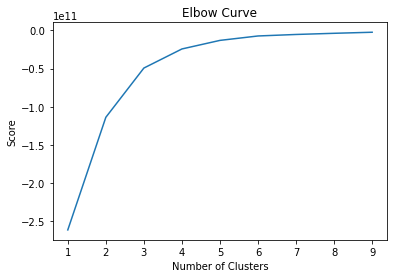

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I have chosen to have four cluster as the line starts to level off at that point.

### 3. k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_CA_3)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [25]:
df_CA_3['clusters'] = kmeans.fit_predict(df_CA_3)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [26]:
df_CA_3.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters
229,2005,202,89.0,38.573611,-119.554722,4,0
723,2005,218,27.9,35.657500,-118.045556,6,0
2595,2005,217,10.0,41.638611,-120.707500,5,0
2781,2005,217,104.0,41.722778,-120.685556,5,0
4111,2005,271,80.0,34.644444,-118.336389,3,0


In [27]:
df_CA_3['clusters'].value_counts()

0    2011
2      58
1       4
3       1
Name: clusters, dtype: int64

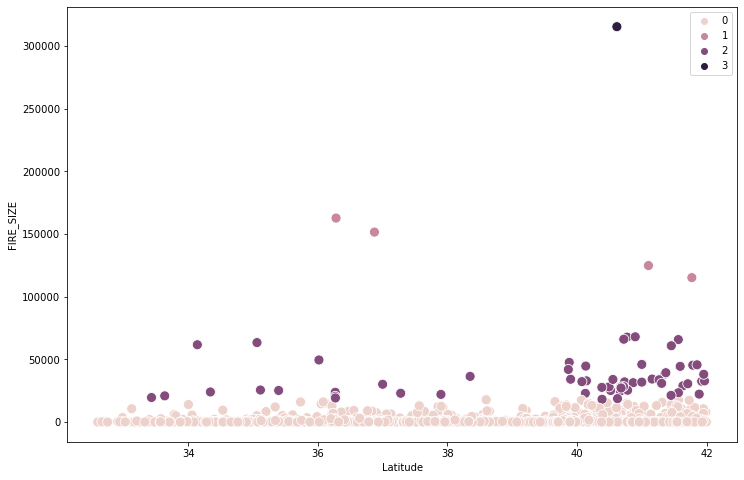

In [28]:
# Plot the clusters for the "Latitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_CA_3['LATITUDE'], y=df_CA_3['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- The further north in California, the higher number of larger, natural cause wildfires
- Looking at summary statistics may help further understand how the clusters were created

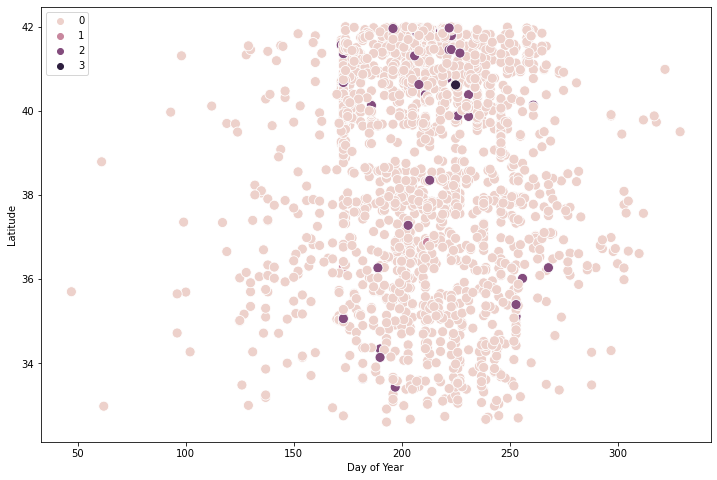

In [29]:
# Plot the clusters for the "Discovery day of year" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_CA_3['DISCOVERY_DOY'], y=df_CA_3['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Day of Year') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- The majority of the larger, natural cause wildfires in California ocurr between June and September which would make sense as this is when the climate is warmest and driest
- The largest natural cause wildfire in California ocurred in August

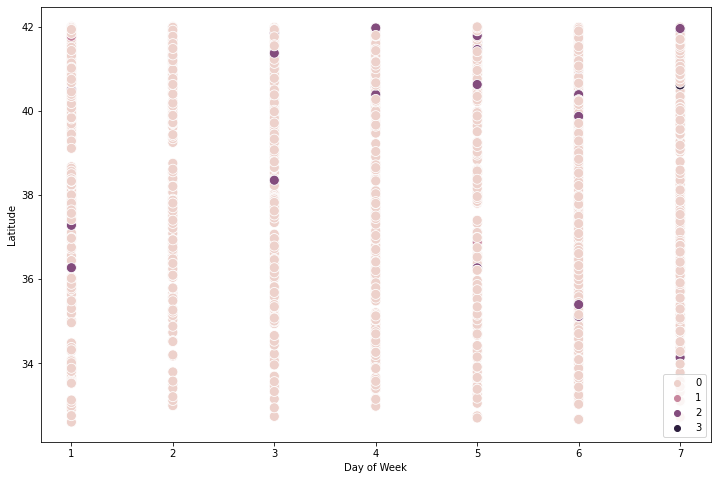

In [30]:
# Plot the clusters for the "Discovery day of week" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_CA_3['Disc_DOW_num'], y=df_CA_3['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Day of Week') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Not much to take from the above graph as there is no particular day with more or fewer natural cause wildfires in California which makes sense as I would expect the ocurrances to be random.

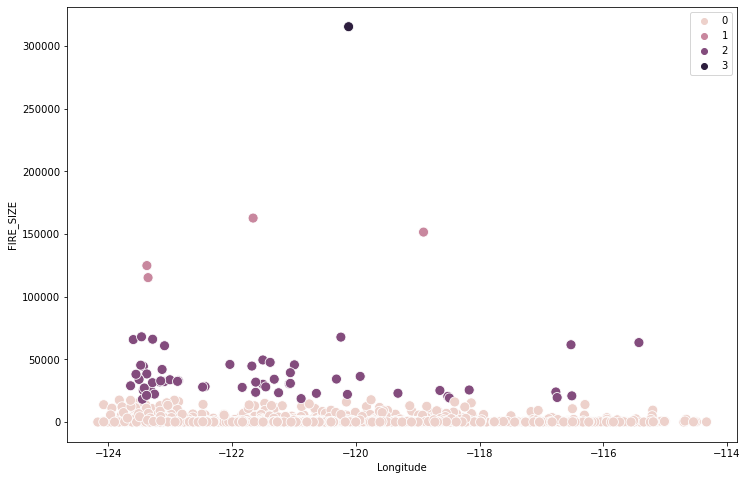

In [31]:
# Plot the clusters for the "Longitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_CA_3['LONGITUDE'], y=df_CA_3['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- The further west in California, the higher number of larger, natural cause wildfires although this is expected due to the geography of the state
- Looking at summary statistics may help further understand how the clusters were created

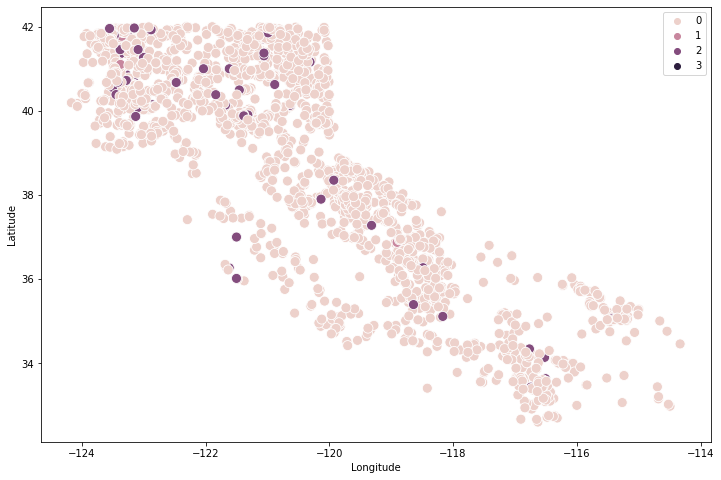

In [32]:
# Plot the clusters for the "Longitude" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_CA_3['LONGITUDE'], y=df_CA_3['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Clearly shows the geography of California
- Most of the largest, natural cause wildfires ocurr in the North of the state

In [36]:
df_CA_3.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters
229,2005,202,89.0,38.573611,-119.554722,4,0
723,2005,218,27.9,35.657500,-118.045556,6,0
2595,2005,217,10.0,41.638611,-120.707500,5,0
2781,2005,217,104.0,41.722778,-120.685556,5,0
4111,2005,271,80.0,34.644444,-118.336389,3,0


In [37]:
df_CA_3.loc[df_CA_3['clusters'] == 3, 'cluster'] = 'Dark purple'
df_CA_3.loc[df_CA_3['clusters'] == 2, 'cluster'] = 'Purple'
df_CA_3.loc[df_CA_3['clusters'] == 1, 'cluster'] = 'Pink'
df_CA_3.loc[df_CA_3['clusters'] == 0, 'cluster'] = 'Salmon'

In [39]:
df_CA_3.groupby('cluster').agg({'DISCOVERY_DOY':['mean', 'median'], 
                         'FIRE_SIZE':['mean', 'median'], 
                         'LATITUDE':['mean', 'median'],
                          'LONGITUDE':['mean', 'median'],
                          'Disc_DOW_num':['mean', 'median']}).round(2)

DISCOVERY_DOY         FIRE_SIZE           LATITUDE         \
                     mean median       mean    median     mean median   
cluster                                                                 
Dark purple        225.00  225.0  315578.80  315578.8    40.62  40.62   
Pink               210.75  217.5  138654.55  138260.5    39.01  38.99   
Purple             209.45  211.0   34817.72   31645.5    39.62  40.67   
Salmon             210.67  211.0     957.99      81.5    38.72  39.52   

            LONGITUDE         Disc_DOW_num         
                 mean  median         mean median  
cluster                                            
Dark purple   -120.12 -120.12         7.00    7.0  
Pink          -121.82 -122.51         3.25    3.0  
Purple        -121.48 -121.76         4.19    4.0  
Salmon        -120.40 -120.51         4.00    4.0